# kNN(k Nearest Neighbours) algorithm Case Study on Titanic Survival prediction

In this project we are going to study and apply kNN classification algorithm on titanic dataset. The project is being implemented through below parts for better understanding as usually. For deep diving of these algorithms and to reduce the time consuming work, we have googled few val uable resources for methods using to find optimal k-value

This project is divided into below parts:<br>
1. Introduction to kNN
2. Collecting and loading the data
3. Preprocessing
4. kNN modelling
5. performance evaluation
6. Choosing k-value

As we already did the Decision tree and random forest case study on Titanic survival prediction, we will now focus on applying kNN Algorithm on titanic dataset. Using a function, we minimize the code and evaluate the best of k-value that fits the model and getting the confusion matrix. The exploratory data analysis part will be skipped as this is already been covered in Decision tree and Random forest case study which can be referred through below github link

https://github.com/alone-survivour/LetsUpgrade-AI-ML/tree/master/Day%2024/TitanicAnalysis_DTRF

## 1. Introduction to kNN

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It’s easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

In [1]:
from IPython.display import Image
Image(url="http://sprintaitech.com/wp-content/uploads/2020/02/Technologies_NearestNeighbour_NoResize_5.png")

## 2. Collecting and loading the data

The required datasets can be downloaded from below kaggle website repository https://www.kaggle.com/c/titanic/data

We have train and test.csv files. As name suggests, train.csv file is used for modelling and training the model and test.csv file is used to predict if a passenger is survived or perished in that incident.

The both files consist of 12 columns and 891 observations. The columns description is given as below

1. PassengerID
2. Survived - 0 - NotSurvived, 1 - Survived
3. Pclass - 1 - Economical, 2 - Business, 3 - Business Premium
4. Name
5. Sex - Male, Female
6. Age
7. SibSp - Siblings
8. Parch - Parent Child
9. Ticket
10. Fare
11. Cabin - A,B,C,D,E,F,G,T
12. Embarked - S, Q, C

In [16]:
#Loading the required libraries

#Warnings package for ignoring unneccesary warnings
import warnings 
warnings.filterwarnings('ignore')

#Data storage and Manipulation libraries
import numpy as np
import pandas as pd

#Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


#Machine learning and kNN classifier libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score

**Note**: We imported StandardScaler package because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [3]:
#Load the dataset and creating dataframes
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,32.699854,14.346821,0.42,22.0000,32.0000,45.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

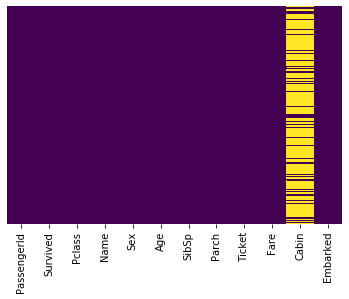

In [7]:
#checking the null values
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The cabin feature has more na junk and it can be dropped. Also the name, ticket and passengerId can also be dropped as these columns will not effect our model

## 3. Preprocessing

In [43]:
#Creating a copy of dataframe so that our preprocessing steps will not disturb our original dataframe
data = train.copy()

#Select the columns to drop off
cols = ['Name','Ticket','Cabin','PassengerId']

#drop using drop() function
data.drop(cols, axis=1, inplace=True)

#checking the dataframe again
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [44]:
#Converting the sex and embarked columns to categorical
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data['Embarked'] = data['Embarked'].map({'C':0,'Q':1,'S':2})

In [45]:
#a function that converts age numerical to categorical
def get_age(age):
      
    if (age<=12):
        return 0
    elif (12<age<=18):
        return 1
    elif (18<age<=30):
        return 2
    elif (30<age<=60):
        return 3
    elif (60<age):
        return 4
    
    
#a function that converts fare numerical to categorical
def get_fare(fare):
      
    if (fare<=8):
        return 0
    elif (8<fare<=14):
        return 1
    elif (14<fare<=31):
        return 2
    elif (31<fare):
        return 3
    
    
#Applying
Fare = data['Fare']
data['Fare']= np.array([get_fare(x) for x in Fare])
Age = data['Age']
data['Age']= np.array([get_age(x) for x in Age])

In [46]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,0,2
1,1,1,0,3,1,0,3,0
2,1,3,0,2,0,0,0,2
3,1,1,0,3,1,0,3,2
4,0,3,1,3,0,0,1,2


In [47]:
scaler = StandardScaler()
scaler.fit(data.drop('Survived',axis=1))
scaled_features = scaler.transform(data.drop('Survived',axis=1))
scaled_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
scaled_feat.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.825209,0.735342,-0.349089,0.431350,-0.474326,-1.308885,0.586840
1,-1.572211,-1.359911,0.710092,0.431350,-0.474326,1.335658,-1.939555
2,0.825209,-1.359911,-0.349089,-0.475199,-0.474326,-1.308885,0.586840
3,-1.572211,-1.359911,0.710092,0.431350,-0.474326,1.335658,0.586840
4,0.825209,0.735342,0.710092,-0.475199,-0.474326,-0.427371,0.586840


## 4. Building model using kNN

In [69]:
#Define the variables
X_train, X_test, y_train, y_test = train_test_split(scaled_feat,data['Survived'],test_size=0.33)

In [70]:
#Lets build and check the performace of model by taking a random k value(n_neighbours)
model_knn = KNeighborsClassifier(n_neighbors=1)

In [71]:
#fit and train the model with training data
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [72]:
#make predictions
pred = model_knn.predict(X_test)

## 5. Performance evaluation

In [73]:
print(confusion_matrix(y_test,pred))

[[145  37]
 [ 30  82]]


In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       182
           1       0.69      0.73      0.71       112

    accuracy                           0.77       294
   macro avg       0.76      0.76      0.76       294
weighted avg       0.78      0.77      0.77       294



## 6. Choosing k-value

So, from the above report, the accuracy is not that much good for our model. Now here k-value plays an important role and deciding factor for increase/decrease of accuracy score of model. Now using traditional trial-error method, it will be a time consuming work. Now choosing best k-value can be achieved in below two ways

1. Elbow method
2. GridSearchCV method

### 1. Elbow method

the “elbow” method helps us to select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.<br>

In [75]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

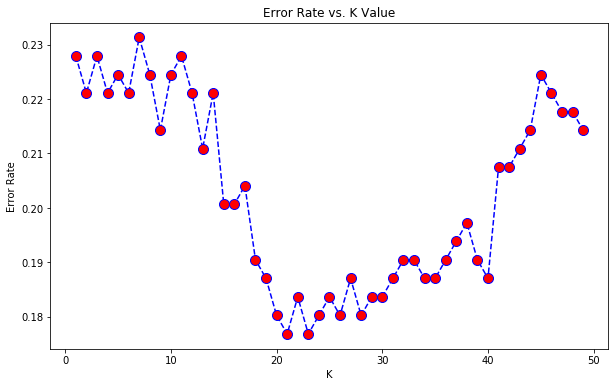

In [76]:
#plot the figure to visualize and select the k-value from graph
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the above graph, the minimal error rate occured at k=21,23. So picking k-value from either of these two could be best choice.

Now let us see whether our model accuracy score has been increased after imploying the best k-value obtained from graph

In [82]:
#Lets build and check the performace of model by taking a best k value(n_neighbours obtained from above graph)
model_knn = KNeighborsClassifier(n_neighbors=21)

In [83]:
#fit and train the model with training data
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [84]:
#make predictions
pred = model_knn.predict(X_test)

In [85]:
print(confusion_matrix(y_test,pred))

[[164  18]
 [ 34  78]]


In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       182
           1       0.81      0.70      0.75       112

    accuracy                           0.82       294
   macro avg       0.82      0.80      0.81       294
weighted avg       0.82      0.82      0.82       294



Now you can see that accuracy score has been increased a little bit for best chosen k-value(k=21) when compared to previous accuracy obtained for K=1. So like this way, we can choose the optimal clusters/neighbours value and imporve the model performace

### 2. GridSearchCV method

GridSearchCV is a method to search the candidate best parameters exhaustively from the grid of given parameters. Target estimator (model) and parameters for search need to be provided for this cross-validation search method.

In [89]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(scaled_feat,data['Survived'])
print('Best k value: {}'.format(knn_cv.best_params_))
print('Best score: {}'.format(knn_cv.best_score_))

Best k value: {'n_neighbors': 9}
Best score: 0.8267875383043922


In [91]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feat,data['Survived'],test_size=0.33, random_state=101)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy of k-NN test: {}'.format(knn.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of k-NN test: 0.8163265306122449
[[155  19]
 [ 35  85]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       174
           1       0.82      0.71      0.76       120

    accuracy                           0.82       294
   macro avg       0.82      0.80      0.81       294
weighted avg       0.82      0.82      0.81       294



### References:<br>
https://www.datatechnotes.com/2019/09/how-to-use-gridsearchcv-in-python.html#:~:text=How%20to%20Use%20GridSearchCV%20in%20Python%20GridSearchCV%20is,to%20be%20provided%20for%20this%20cross-validation%20search%20method.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

Elbow method source: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html